# Harmonic Oscillator and 1D Kepler problem

- Write your own solver
- Investigate behavior / compare with analytic solution / conservation
- Notice exponential growth of Euler forward error
- Write a different solver and compare
- Plot stuff
- Anharmonic oscillator: investigate period vs amplitude
- Leave damped analytic as placeholder for now.
- Practice looking at limits - turn off spring, etc.
- Analyze errors in leapfrog energy - RICHARD: study them numerically? or do some numerical analysis?
- Solve for planetary orbit
- Investigate features

Other stuff
- See how naive solvers can really fail
- Compare with "good" solvers - see how they can be much better, but also fail
- Intro to chaos? 3 body?
- Investigate reversibility (or irrev) of the solvers
- Analyze how/when Verlet exactly conserves angular momentum

Nice discussion of integrators
http://physics.ucsc.edu/~peter/242/leapfrog.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Simple Harmonic Oscillator

Let's solve for the motion of a simple "mass on a spring" system.'

We'll begin with the simplest means of stepping forward in time - the Euler forward algorithm.

In [2]:
def SHO_euler_step(x, v, k, m, dt):
    net_force = -k * x
    a = net_force / m
    x += v * dt
    v += a * dt
    return x, v

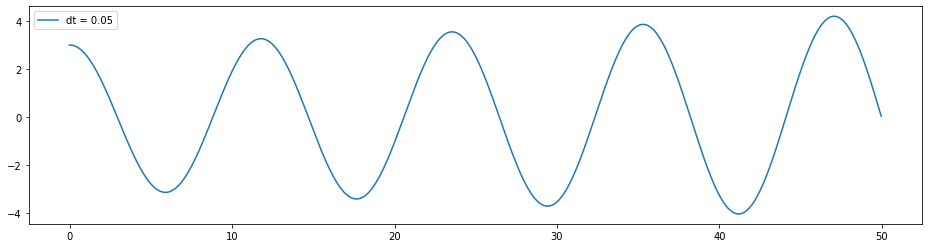

In [3]:
# Define the system.
k = 2.0
m = 7.0

# Choose initial conditions.
x = 3.0
v = 0.0

# Define the simulation.
N = 1000
dt = 0.05

# Prepare lists to collect the simulation data.
xs = [x]
vs = [v]

for step in range(N-1):
    newx, newv = SHO_euler_step(x=xs[step], v=vs[step], k=k, m=m, dt=dt)
    xs.append(newx)
    vs.append(newv)

fig = plt.figure(figsize=(16, 4))
times = dt*np.arange(N)
plt.plot(times, xs, '-', label='dt = {}'.format(dt))
plt.legend()

# Not bad - it gets the basic idea.

What happens when you integrate for 10 times as many steps?

TRY: Show algebraically what is going on to the amplitude.

Maybe we need to "crank" up the resolution and use a smaller dt.

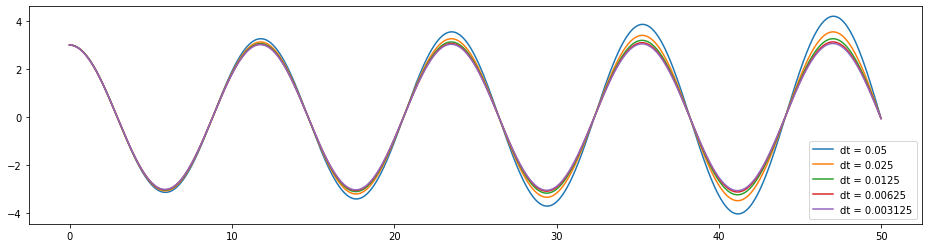

In [4]:
# Experiment with different values for dt.

# Choose initial conditions
x = 3.0
v = 0.0
k = 2.0
m = 7.0

fig = plt.figure(figsize=(16, 4))

T = 50
dt0 = 0.05

# Simulate and plot for several values of dt.
for dt in dt0 * 0.5**np.arange(0, 5): # Check your understanding of this line.

    N = int(T/dt)

    xs = [x]
    vs = [v]

    for step in range(N-1):
        newx, newv = SHO_euler_step(x=xs[step], v=vs[step], k=k, m=m, dt=dt)
        xs.append(newx)
        vs.append(newv)

    times = dt*np.arange(N)
    plt.plot(times, xs, '-', label='dt = {}'.format(dt))

plt.legend()

# Good enough?

The smallest value for dt looks pretty good.
But what if we want to model an oscillator that is running for $10^3$ periods?

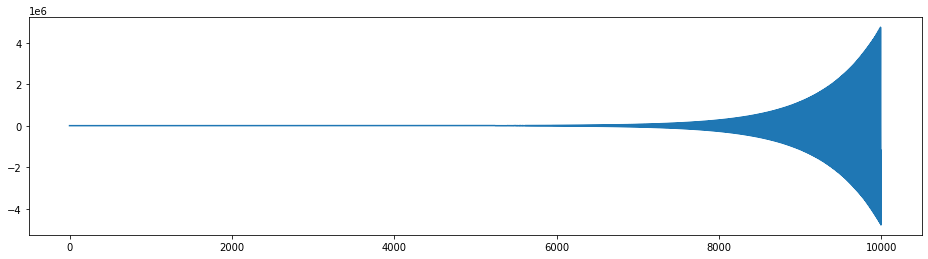

In [8]:
# Simulate 1000 periods.
N = YOUFILLIN # 10**6
dt = 0.01

# Choose initial conditions
x = 3.0
v = 0.0
k = 2.0
m = 7.0

fig = plt.figure(figsize=(16, 4))

xs = [x]
vs = [v]

for step in range(N-1):
    newx, newv = SHO_euler_step(x=xs[step], v=vs[step], k=k, m=m, dt=dt)
    xs.append(newx)
    vs.append(newv)

times = dt*np.arange(N)
plt.plot(times, xs, '-', label='dt = {}'.format(dt))

In [9]:
def SHO_energy(x, v, k, m):
    """
    Total energy of simple harmonic oscillator.
    E = KE + PE = \frac{1}{2} m v^2 + \frac{1}{2} k x^2
    """
    return 0.5 * m * v**2 + 0.5 * k * x**2

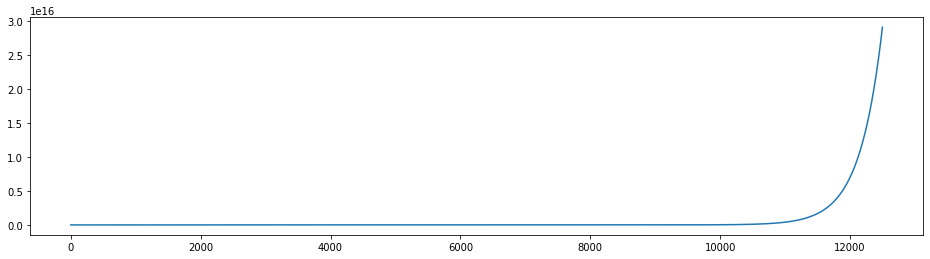

In [58]:
# Look at the evolution of energy.

N = 5000 * 250
dt = 0.01

# Choose initial conditions
x = 3.0
v = 0.0
k = 2.0
m = 7.0

fig = plt.figure(figsize=(16, 4))

xs = [x]
vs = [v]

for step in range(N-1):
    newx, newv = SHO_euler_step(x=xs[step], v=vs[step], k=k, m=m, dt=dt)
    xs.append(newx)
    vs.append(newv)

times = dt*np.arange(N)

# Different ways to compute the energies.
# Compute energies using a list.
energies = []
for ind in range(N):
    energies.append(SHO_energy(xs[ind], vs[ind], k, m))

# Compute energies using a list comprehension instead.
# energies = [SHO_energy(xs[ind], vs[ind], k, m) for ind in range(N)]

# If we convert the input lists to arrays, we can compute in a more "natural" way.
# Look at the SHO_energy function - the operations here all work "correctly" on numpy arrays too.
# TRY: Can you come up with an energy function that will *not correctly generalize to arrays?
# xs = np.array(xs)
# vs = np.array(vs)
# energies = SHO_energy(xs, vs, k, m)

plt.plot(times, energies, '-', label='dt = {}'.format(dt))

In [50]:
def SHO_euler_step2(x, v, k, m, dt):
    # Present as playing with the order of the computation of x and v as a way toward leapfrog.
    x += v * dt
    net_force = -k * x
    a = net_force / m
    v += a * dt
    return x, v

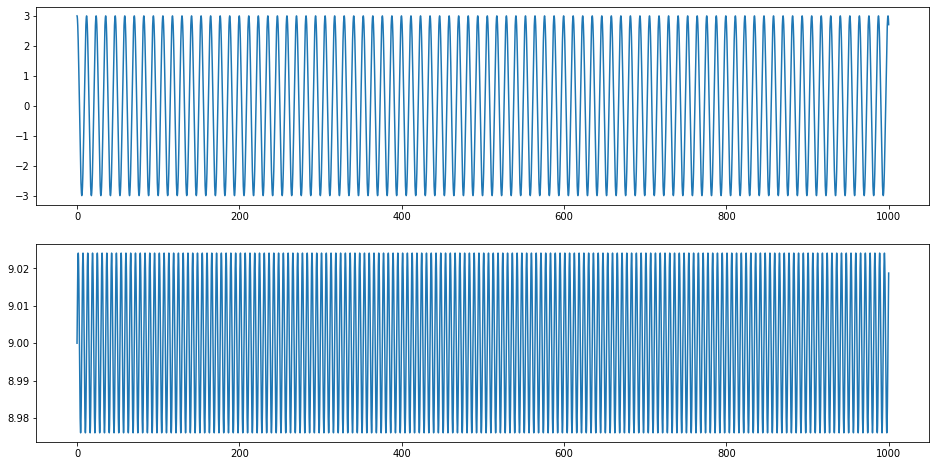

In [65]:
# Look at stability of this slightly different integration.

N = 5000*20
dt = 0.01

# Choose initial conditions
x = 3.0
v = 0.0
k = 2.0
m = 7.0

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

xs = [x]
vs = [v]

for step in range(N-1):
    newx, newv = SHO_euler_step2(x=xs[step], v=vs[step], k=k, m=m, dt=dt)
    xs.append(newx)
    vs.append(newv)

times = dt*np.arange(N)
ax[0].plot(times, xs, '-', label='dt = {}'.format(dt))

xs = np.array(xs)
vs = np.array(vs)
energies = SHO_energy(xs, vs, k, m)

ax[1].plot(times, energies, '-', label='dt = {}'.format(dt))

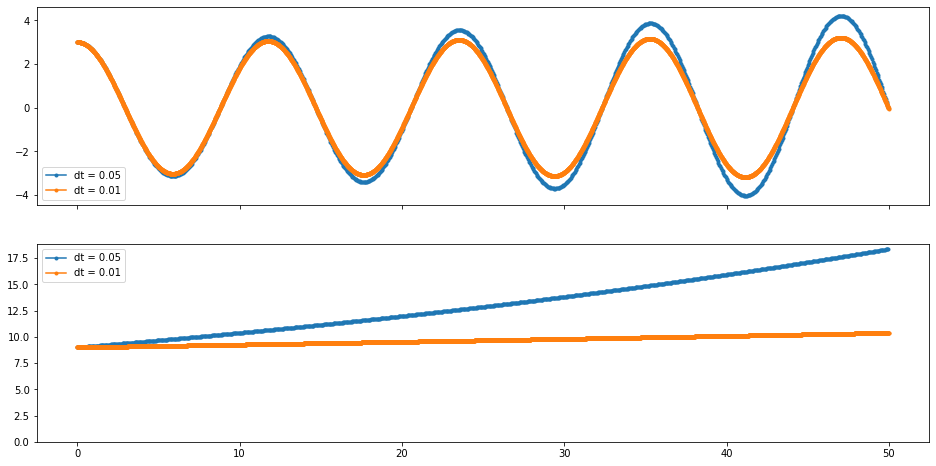

In [6]:
# Let's package things up a little more neatly.

def SHO_euler_step_(x, v, k, m, dt):
    # Present as playing with the order of the computation of x and v as a way toward leapfrog.
    net_force = -k * x
    a = net_force / m
    x += v * dt
    v += a * dt
    return x, v

In [ ]:
# Accuracy improves with decreasing dt - not surprising.
# Challenge: can you imagine some kind of simulation where the accuracy became worse as dt became very very small?
# Period looks more or less correct. We could investigate this with more care - e.g. period vs dt.
# 

In [ ]:
# There are some programming issues we could explore here - or we could save for later.
# Integration function / class
# "x, v" -> general configuration
# Use dt and T instead of dt and N - better I think.
